# DD Data Visualization

In [2]:
%matplotlib widget

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipympl

## Reading preprocessed DD data

Using `2_basic_data_preprocessing.ipynb`.

In [3]:
df = pd.read_csv('../data/preprocessed.csv')

dd = df.copy()
dd["time"] = pd.to_datetime(df["time"])
dd = dd[dd["event_type"] == "d"]
dd = dd.sort_values(by='time')
dd

,time,event_type,channel,value
18555093,2023-04-16 14:05:35.501000,d,1,0
18555095,2023-04-16 14:05:35.501000,d,3,0
18555096,2023-04-16 14:05:35.501000,d,4,0
18555097,2023-04-16 14:05:35.501000,d,5,0
18555098,2023-04-16 14:05:35.501000,d,6,0
...,...,...,...,...
7367317,2024-03-06 14:56:39.427698,d,3,2
7367316,2024-03-06 14:56:39.427698,d,2,0
7367315,2024-03-06 14:56:39.427698,d,1,1
7367331,2024-03-06 14:56:39.427698,d,17,2


## Downloading kernel file

In [4]:
mkdir -p ../data_extra

In [5]:
!wget -P ../data_extra/ https://spiftp.esac.esa.int/data/SPICE/JUICE/kernels/ik/juice_radem_v03.ti

--2024-03-07 15:33:17--  https://spiftp.esac.esa.int/data/SPICE/JUICE/kernels/ik/juice_radem_v03.ti
Resolving spiftp.esac.esa.int (spiftp.esac.esa.int)... 193.147.153.190
Connecting to spiftp.esac.esa.int (spiftp.esac.esa.int)|193.147.153.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46083 (45K) [text/plain]
Saving to: ‘../data_extra/juice_radem_v03.ti’

juice_radem_v03.ti  100%[===================>]  45.00K  --.-KB/s    in 0.1s    

2024-03-07 15:33:18 (426 KB/s) - ‘../data_extra/juice_radem_v03.ti’ saved [46083/46083]



## ~~Processing kernel file~~ Hardcoding kernel file

In [6]:
KERNEL = {}

### DD channels

In [7]:
KERNEL["INS_2808900_NAME"] = 'JUICE_RADEM_DD_00'
KERNEL["INS_2808900_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808900_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808900_BORESIGHT"] = (0.000000,       0.000000,     1.000000)
KERNEL["INS_2808900_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808900_FOV_REF_VECTOR"] = (1.000000,       0.000000,     0.000000)
KERNEL["INS_2808900_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808900_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808901_NAME"] = 'JUICE_RADEM_DD_01'
KERNEL["INS_2808901_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808901_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808901_BORESIGHT"] = (0.38268,       0.00000,     0.92388)
KERNEL["INS_2808901_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808901_FOV_REF_VECTOR"] = (-0.92388,       0.00000,     0.38268)
KERNEL["INS_2808901_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808901_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808902_NAME"] = 'JUICE_RADEM_DD_02'
KERNEL["INS_2808902_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808902_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808902_BORESIGHT"] = (0.29315,       0.24598,     0.92388)
KERNEL["INS_2808902_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808902_FOV_REF_VECTOR"] = (-0.70773,       -0.59386,     0.38268)
KERNEL["INS_2808902_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808902_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808903_NAME"] = 'JUICE_RADEM_DD_03'
KERNEL["INS_2808903_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808903_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808903_BORESIGHT"] = (0.06645,       0.37687,     0.92388)
KERNEL["INS_2808903_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808903_FOV_REF_VECTOR"] = (-0.16043,       -0.90984,     0.38268)
KERNEL["INS_2808903_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808903_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808904_NAME"] = 'JUICE_RADEM_DD_04'
KERNEL["INS_2808904_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808904_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808904_BORESIGHT"] = (-0.19134,       0.33141,     0.92388)
KERNEL["INS_2808904_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808904_FOV_REF_VECTOR"] = (0.46194,       -0.80010,     0.38268)
KERNEL["INS_2808904_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808904_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808905_NAME"] = 'JUICE_RADEM_DD_05'
KERNEL["INS_2808905_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808905_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808905_BORESIGHT"] = (-0.35960,       0.13089,     0.92388)
KERNEL["INS_2808905_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808905_FOV_REF_VECTOR"] = (0.86816,       -0.31599,     0.38268)
KERNEL["INS_2808905_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808905_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808906_NAME"] = 'JUICE_RADEM_DD_06'
KERNEL["INS_2808906_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808906_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808906_BORESIGHT"] = (-0.35960,       -0.13089,     0.92388)
KERNEL["INS_2808906_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808906_FOV_REF_VECTOR"] = (0.86816,       0.31599,     0.38268)
KERNEL["INS_2808906_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808906_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808907_NAME"] = 'JUICE_RADEM_DD_07'
KERNEL["INS_2808907_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808907_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808907_BORESIGHT"] = (-0.19134,       -0.33141,     0.92388)
KERNEL["INS_2808907_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808907_FOV_REF_VECTOR"] = (0.46194,       0.80010,     0.38268)
KERNEL["INS_2808907_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808907_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808908_NAME"] = 'JUICE_RADEM_DD_08'
KERNEL["INS_2808908_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808908_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808908_BORESIGHT"] = (0.06645,       -0.37687,     0.92388)
KERNEL["INS_2808908_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808908_FOV_REF_VECTOR"] = (-0.16043,       0.90984,     0.38268)
KERNEL["INS_2808908_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808908_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808909_NAME"] = 'JUICE_RADEM_DD_09'
KERNEL["INS_2808909_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808909_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808909_BORESIGHT"] = (0.29315,       -0.24598,     0.92388)
KERNEL["INS_2808909_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808909_FOV_REF_VECTOR"] = (-0.70773,       0.59386,     0.38268)
KERNEL["INS_2808909_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808909_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808910_NAME"] = 'JUICE_RADEM_DD_10'
KERNEL["INS_2808910_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808910_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808910_BORESIGHT"] = (0.70711,       0.00000,     0.70711)
KERNEL["INS_2808910_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808910_FOV_REF_VECTOR"] = (-0.70711,       0.00000,     0.70711)
KERNEL["INS_2808910_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808910_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808911_NAME"] = 'JUICE_RADEM_DD_11'
KERNEL["INS_2808911_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808911_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808911_BORESIGHT"] = (0.54168,       0.45452,     0.70711)
KERNEL["INS_2808911_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808911_FOV_REF_VECTOR"] = (-0.54168,       -0.45452,     0.70711)
KERNEL["INS_2808911_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808911_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808912_NAME"] = 'JUICE_RADEM_DD_12'
KERNEL["INS_2808912_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808912_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808912_BORESIGHT"] = (0.12279,       0.69636,     0.70711)
KERNEL["INS_2808912_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808912_FOV_REF_VECTOR"] = (-0.12279,       -0.69636,     0.70711)
KERNEL["INS_2808912_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808912_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808913_NAME"] = 'JUICE_RADEM_DD_13'
KERNEL["INS_2808913_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808913_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808913_BORESIGHT"] = (-0.35355,       0.61237,     0.70711)
KERNEL["INS_2808913_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808913_FOV_REF_VECTOR"] = (0.35355,       -0.61237,     0.70711)
KERNEL["INS_2808913_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808913_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808914_NAME"] = 'JUICE_RADEM_DD_14'
KERNEL["INS_2808914_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808914_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808914_BORESIGHT"] = (-0.66446,       0.24184,     0.70711)
KERNEL["INS_2808914_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808914_FOV_REF_VECTOR"] = (0.66446,       -0.24184,     0.70711)
KERNEL["INS_2808914_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808914_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808915_NAME"] = 'JUICE_RADEM_DD_15'
KERNEL["INS_2808915_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808915_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808915_BORESIGHT"] = (-0.66446,       -0.24184,     0.70711)
KERNEL["INS_2808915_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808915_FOV_REF_VECTOR"] = (0.66446,       0.24184,     0.70711)
KERNEL["INS_2808915_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808915_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808916_NAME"] = 'JUICE_RADEM_DD_16'
KERNEL["INS_2808916_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808916_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808916_BORESIGHT"] = (-0.35355,       -0.61237,     0.70711)
KERNEL["INS_2808916_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808916_FOV_REF_VECTOR"] = (0.35355,       0.61237,     0.70711)
KERNEL["INS_2808916_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808916_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808917_NAME"] = 'JUICE_RADEM_DD_17'
KERNEL["INS_2808917_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808917_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808917_BORESIGHT"] = (0.12279,       -0.69636,     0.70711)
KERNEL["INS_2808917_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808917_FOV_REF_VECTOR"] = (-0.12279,       0.69636,     0.70711)
KERNEL["INS_2808917_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808917_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808918_NAME"] = 'JUICE_RADEM_DD_18'
KERNEL["INS_2808918_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808918_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808918_BORESIGHT"] = (0.54168,       -0.45452,     0.70711)
KERNEL["INS_2808918_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808918_FOV_REF_VECTOR"] = (-0.54168,       0.45452,     0.70711)
KERNEL["INS_2808918_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808918_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808919_NAME"] = 'JUICE_RADEM_DD_19'
KERNEL["INS_2808919_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808919_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808919_BORESIGHT"] = (-0.92388,       0.00000,     0.38268)
KERNEL["INS_2808919_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808919_FOV_REF_VECTOR"] = (0.38268,       -0.00000,     0.92388)
KERNEL["INS_2808919_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808919_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808920_NAME"] = 'JUICE_RADEM_DD_20'
KERNEL["INS_2808920_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808920_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808920_BORESIGHT"] = (-0.70773,       -0.59386,     0.38268)
KERNEL["INS_2808920_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808920_FOV_REF_VECTOR"] = (0.29315,       0.24598,     0.92388)
KERNEL["INS_2808920_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808920_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808921_NAME"] = 'JUICE_RADEM_DD_21'
KERNEL["INS_2808921_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808921_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808921_BORESIGHT"] = (-0.16043,       -0.90984,     0.38268)
KERNEL["INS_2808921_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808921_FOV_REF_VECTOR"] = (0.06645,       0.37687,     0.92388)
KERNEL["INS_2808921_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808921_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808922_NAME"] = 'JUICE_RADEM_DD_22'
KERNEL["INS_2808922_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808922_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808922_BORESIGHT"] = (0.46194,       -0.80010,     0.38268)
KERNEL["INS_2808922_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808922_FOV_REF_VECTOR"] = (-0.19134,       0.33141,     0.92388)
KERNEL["INS_2808922_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808922_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808923_NAME"] = 'JUICE_RADEM_DD_23'
KERNEL["INS_2808923_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808923_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808923_BORESIGHT"] = (0.86816,       -0.31599,     0.38268)
KERNEL["INS_2808923_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808923_FOV_REF_VECTOR"] = (-0.35960,       0.13089,     0.92388)
KERNEL["INS_2808923_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808923_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808924_NAME"] = 'JUICE_RADEM_DD_24'
KERNEL["INS_2808924_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808924_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808924_BORESIGHT"] = (0.86816,       0.31599,     0.38268)
KERNEL["INS_2808924_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808924_FOV_REF_VECTOR"] = (-0.35960,       -0.13089,     0.92388)
KERNEL["INS_2808924_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808924_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808925_NAME"] = 'JUICE_RADEM_DD_25'
KERNEL["INS_2808925_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808925_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808925_BORESIGHT"] = (0.46194,       0.80010,     0.38268)
KERNEL["INS_2808925_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808925_FOV_REF_VECTOR"] = (-0.19134,       -0.33141,     0.92388)
KERNEL["INS_2808925_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808925_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808926_NAME"] = 'JUICE_RADEM_DD_26'
KERNEL["INS_2808926_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808926_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808926_BORESIGHT"] = (-0.16043,       0.90984,     0.38268)
KERNEL["INS_2808926_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808926_FOV_REF_VECTOR"] = (0.06645,       -0.37687,     0.92388)
KERNEL["INS_2808926_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808926_FOV_ANGLE_UNITS"] = 'DEGREES'


KERNEL["INS_2808927_NAME"] = 'JUICE_RADEM_DD_27'
KERNEL["INS_2808927_FOV_FRAME"] = 'JUICE_RADEM'
KERNEL["INS_2808927_FOV_SHAPE"] = 'CIRCLE'
KERNEL["INS_2808927_BORESIGHT"] = (-0.70773,       0.59386,     0.38268)
KERNEL["INS_2808927_FOV_CLASS_SPEC"] = 'ANGLES'
KERNEL["INS_2808927_FOV_REF_VECTOR"] = (0.29315,       -0.24598,     0.92388)
KERNEL["INS_2808927_FOV_REF_ANGLE"] = ( 3.500000 )
KERNEL["INS_2808927_FOV_ANGLE_UNITS"] = 'DEGREES'

### Background DD channels

In [8]:
KERNEL["INS_2808928_NAME"]    = 'JUICE_RADEM_DD_BKGD_1'
KERNEL["INS_2808928_FOV_FRAME"]        = 'JUICE_RADEM'
KERNEL["INS_2808928_FOV_SHAPE"]        = 'CIRCLE'
KERNEL["INS_2808928_BORESIGHT"]        = (0.000000,       0.000000,     1.000000)
KERNEL["INS_2808928_FOV_CLASS_SPEC"]   = 'ANGLES'
KERNEL["INS_2808928_FOV_REF_VECTOR"]   = (1.000000,       0.000000,     0.000000)
KERNEL["INS_2808928_FOV_REF_ANGLE"]    = ( 89.99994 )
KERNEL["INS_2808928_FOV_ANGLE_UNITS"]  = 'DEGREES'


KERNEL["INS_2808929_NAME"]    = 'JUICE_RADEM_DD_BKGD_2'
KERNEL["INS_2808929_FOV_FRAME"]        = 'JUICE_RADEM'
KERNEL["INS_2808929_FOV_SHAPE"]        = 'CIRCLE'
KERNEL["INS_2808929_BORESIGHT"]        = (0.000000,       0.000000,     1.000000)
KERNEL["INS_2808929_FOV_CLASS_SPEC"]   = 'ANGLES'
KERNEL["INS_2808929_FOV_REF_VECTOR"]   = (1.000000,       0.000000,     0.000000)
KERNEL["INS_2808929_FOV_REF_ANGLE"]    = ( 89.99994 )
KERNEL["INS_2808929_FOV_ANGLE_UNITS"]  = 'DEGREES'


KERNEL["INS_2808930_NAME"]    = 'JUICE_RADEM_DD_BKGD_3'
KERNEL["INS_2808930_FOV_FRAME"]        = 'JUICE_RADEM'
KERNEL["INS_2808930_FOV_SHAPE"]        = 'CIRCLE'
KERNEL["INS_2808930_BORESIGHT"]        = (0.000000,       0.000000,     1.000000)
KERNEL["INS_2808930_FOV_CLASS_SPEC"]   = 'ANGLES'
KERNEL["INS_2808930_FOV_REF_VECTOR"]   = (1.000000,       0.000000,     0.000000)
KERNEL["INS_2808930_FOV_REF_ANGLE"]    = ( 89.99994 )
KERNEL["INS_2808930_FOV_ANGLE_UNITS"]  = 'DEGREES'

### Helper functions

In [9]:
def kernel_selector(key_key):
    return {key: val for key, val in KERNEL.items() if key_key in key}

def kernel_channel(channel):
    return kernel_selector(f"INS_28089{channel:02d}_")

def kernel_key_to_channel(key):
    return int(key[8:10])

## DD Vectors Visualization

```
   The boresight and field-of-view for each DD aperture is shown in the diagram
   below.

                  +Zradem                                   ^ +yradem
                                                      _.-"""|"""-._
                     ^  22.5 deg                   .-' 15o  o19o14 '-.
                     |                            16o  o20   |     o27 \
              ^      |      ^  45 deg            /  o21    o6|o5       o13
          ^    \     |     /    ^               |       o7  |  o4       +Xradem
           '.   \    |    /   .'     67.5 deg   |           o---o3-o28----->
     <._     '.__\___|___/__.,      _.>         | 17o   o8     o2     o12
        ''--.' '. \  |  / .' _'.--''             \ 22o    o9 o1   o29  /
   +Xradem<--'---'---o---'--'---'------           \ o18        o30 o11/
                  +Yradem                          `-._23o 10o o24_.'
                                                       `-.......-'

        +Yradem is inside the page               +Zradem is out of the page

   for each DD aperture, the field-of-view is represented by the following
   diagram:

                 boresight
                     ^
               \     |     /                         _,----._      ---
                \    |3.5 deg                      .'        `.     ^
                 \   |--./                        /            \    |
                  \  |  /                         |     x      |    | 7 deg
                   \ | /                          \            /    |
                    \o/                            `.        .'     V
                                                     `------'      ---
```

Text(0.5, 0, 'Z')

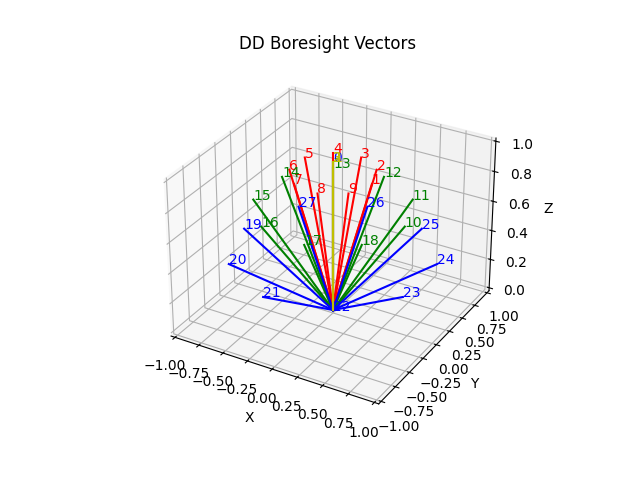

In [48]:
vectors = [(0,0,0, *vec) for vec in kernel_selector("BORESIGHT").values()]
colors = ["b"] * 1 + ["r"] * 9 + ["g"] * 9 + ["b"] * 9 + ["y"] * 3 
labels = [int(name.split("_")[-1]) for name in kernel_selector("NAME").values()]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('DD Boresight Vectors')

for vec, color, label in zip(vectors, colors, labels):
    x_start, y_start, z_start, x_end, y_end, z_end = vec
    ax.plot([x_start, x_end], [y_start, y_end], [z_start, z_end], color=color)
    ax.text(x_end, y_end, z_end, label, color=color)


ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 1.0, 'DD Boresight Vectors 2D projection')

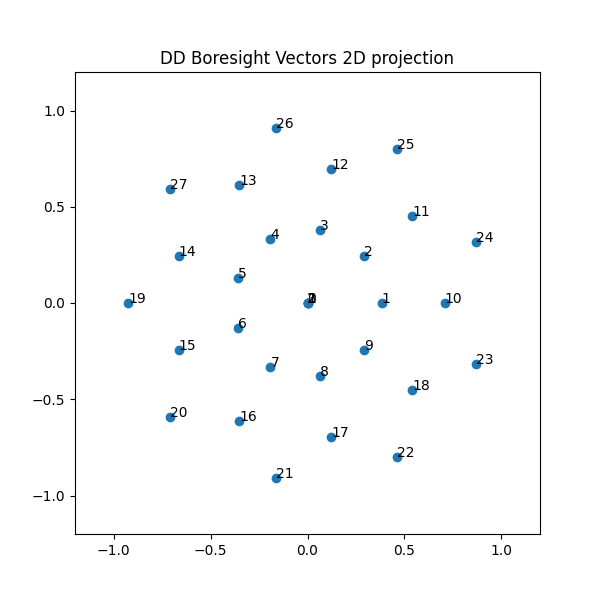

In [49]:
xs = [x for _, _, _, x, _, _ in vectors]
ys = [y for _, _, _, _, y, _ in vectors]
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.scatter(xs, ys)
for x, y, label in zip(xs, ys, labels):
    ax.annotate(xy=(x, y), text=label)
ax.set_title('DD Boresight Vectors 2D projection')


Text(0.5, 0, 'Z')

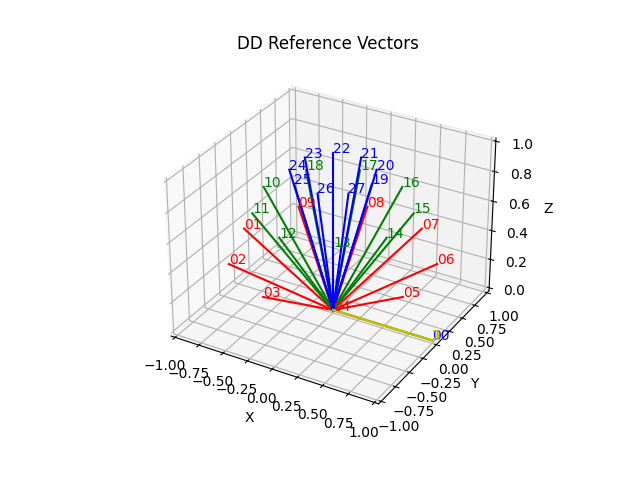

In [50]:
vectors = [(0,0,0, *vec) for vec in kernel_selector("VECTOR").values()]
colors = ["b"] * 1 + ["r"] * 9 + ["g"] * 9 + ["b"] * 9 + ["y"] * 3 
labels = [name.split("_")[-1] for name in kernel_selector("NAME").values()]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title('DD Reference Vectors')

for vec, color, label in zip(vectors, colors, labels):
    x_start, y_start, z_start, x_end, y_end, z_end = vec
    ax.plot([x_start, x_end], [y_start, y_end], [z_start, z_end], color=color)
    ax.text(x_end, y_end, z_end, label, color=color)


ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 1.0, 'DD REF_VECTOR Vectors 2D projection')

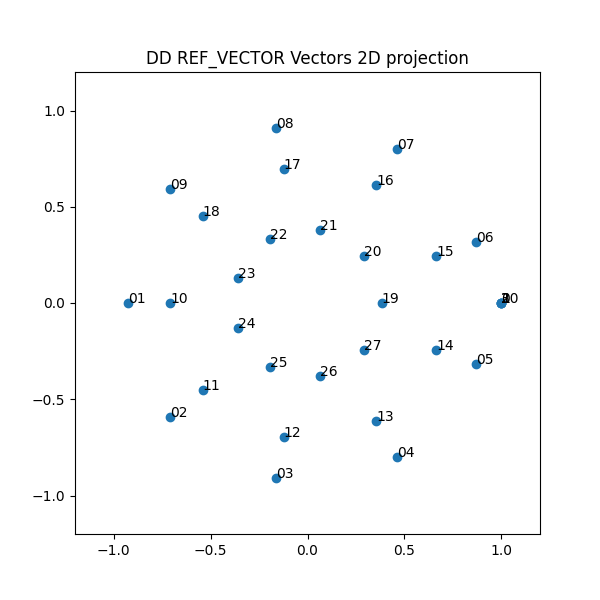

In [51]:
xs = [x for _, _, _, x, _, _ in vectors]
ys = [y for _, _, _, _, y, _ in vectors]
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.scatter(xs, ys)
for x, y, label in zip(xs, ys, labels):
    ax.annotate(xy=(x, y), text=label)
ax.set_title('DD REF_VECTOR Vectors 2D projection')


## DD Values Exploration #1

### Data filtering (since September 2023)

<Axes: xlabel='time'>

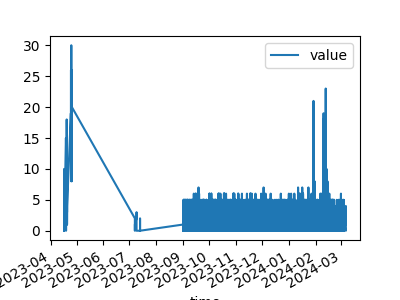

In [12]:
dd[dd["channel"] == 1].plot(x='time', y='value', figsize=(4, 3))

<Axes: xlabel='time'>

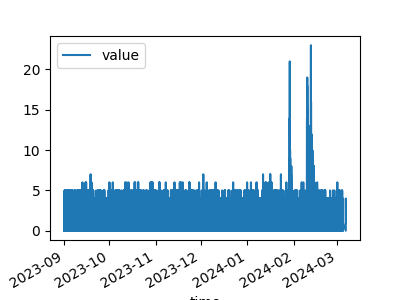

In [13]:
dd_filtered = dd[dd["time"] > "2023-09-01"]
dd_filtered[dd_filtered["channel"] == 1].plot(x='time', y='value', figsize=(4, 3))

### Calculate STD for DD channels values

In [14]:
pd.DataFrame(dd_filtered.groupby('channel')['value'].std())

,value
channel,
1,1.016904
2,1.043677
3,1.074385
4,1.056602
5,1.042900
6,1.001416
7,1.020393
8,0.949870
9,0.969184


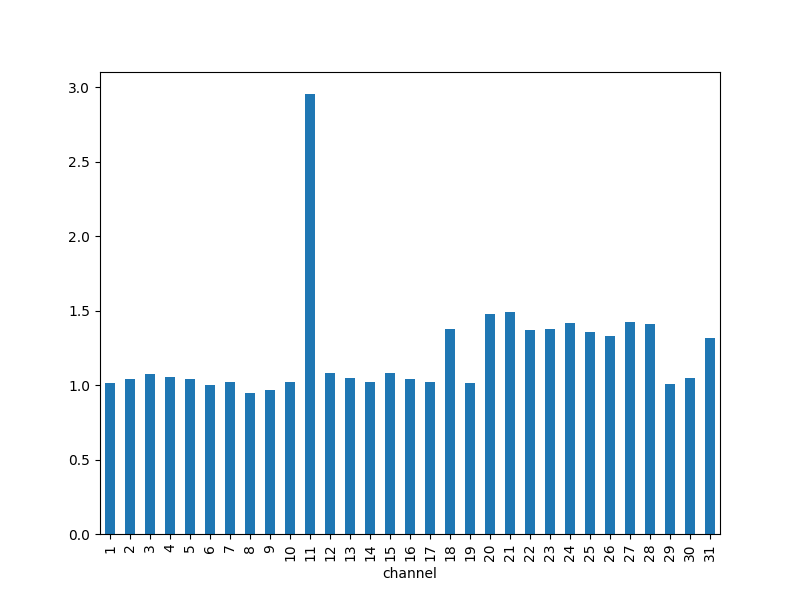

In [15]:
plt.figure(figsize=(8, 6))
dd_filtered.groupby('channel')['value'].std().plot(kind='bar')
plt.show()

### Calculate mean for DD channel values

In [16]:
pd.DataFrame(dd_filtered.groupby('channel')['value'].mean())

,value
channel,
1,0.819832
2,0.883879
3,0.929007
4,0.908814
5,0.894445
6,0.828078
7,0.862028
8,0.777888
9,0.773500


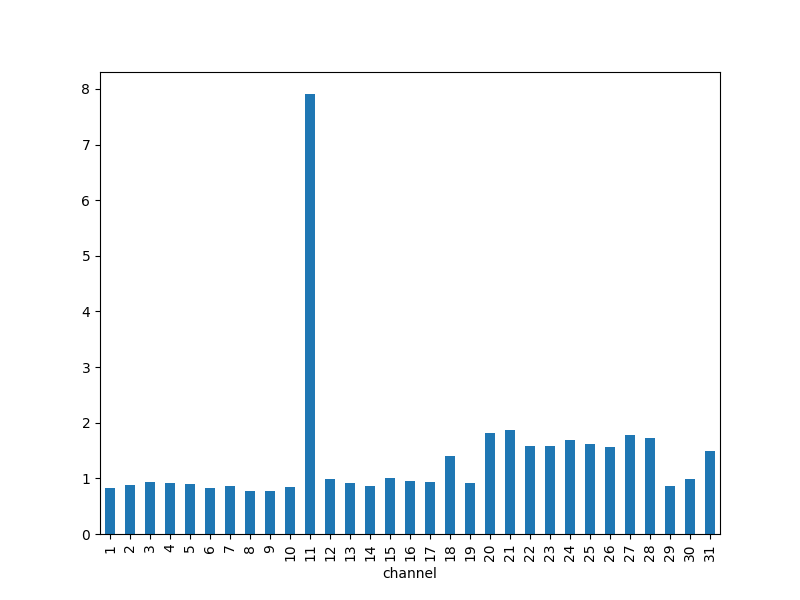

In [17]:
plt.figure(figsize=(8, 6))
dd_filtered.groupby('channel')['value'].mean().plot(kind='bar')
plt.show()

### Interesting data hole from 2024-03-04 to 2024-03-06

#### Channel 1

/tmp/ipykernel_16200/2727097412.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd_filtered[dd_filtered["time"] > "2024-03-04"][dd_filtered["channel"] == 1].plot(x='time', y='value', figsize=(10, 6))


<Axes: xlabel='time'>

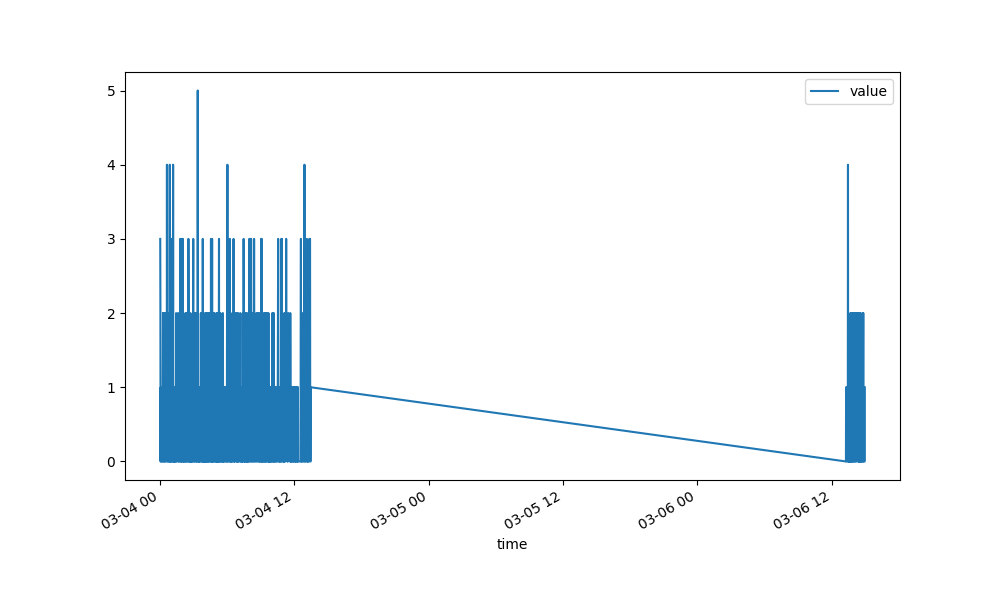

In [18]:
dd_filtered[dd_filtered["time"] > "2024-03-04"][dd_filtered["channel"] == 1].plot(x='time', y='value', figsize=(10, 6))

#### Channel 3

/tmp/ipykernel_16200/1924009683.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd_filtered[dd_filtered["time"] > "2024-03-04"][dd_filtered["channel"] == 3].plot(x='time', y='value', figsize=(10, 6))


<Axes: xlabel='time'>

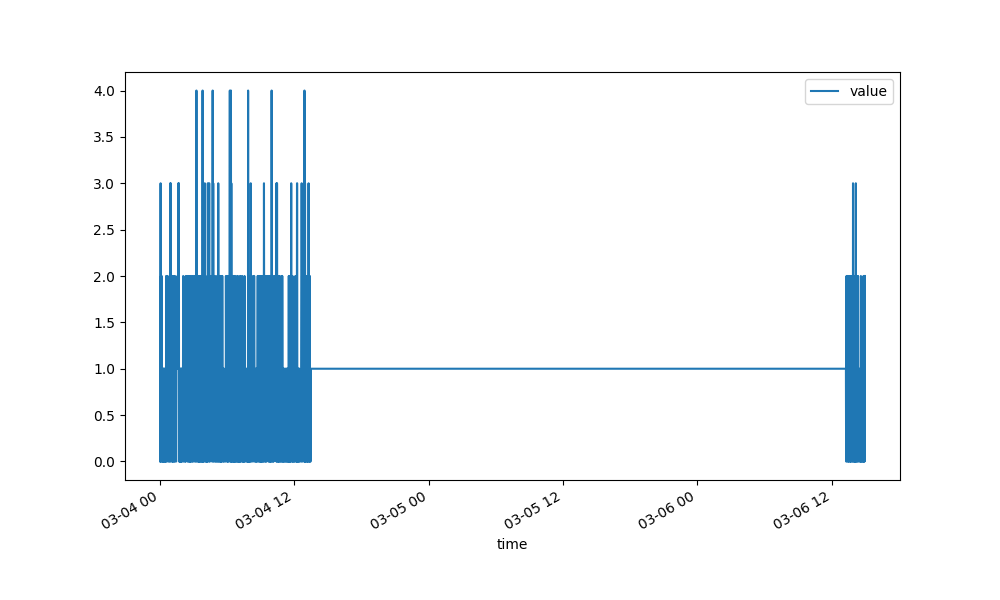

In [19]:
dd_filtered[dd_filtered["time"] > "2024-03-04"][dd_filtered["channel"] == 3].plot(x='time', y='value', figsize=(10, 6))

#### Channel 11

/tmp/ipykernel_16200/1287901681.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dd_filtered[dd_filtered["time"] > "2024-03-04"][dd_filtered["channel"] == 11].plot(x='time', y='value', figsize=(10, 6))


<Axes: xlabel='time'>

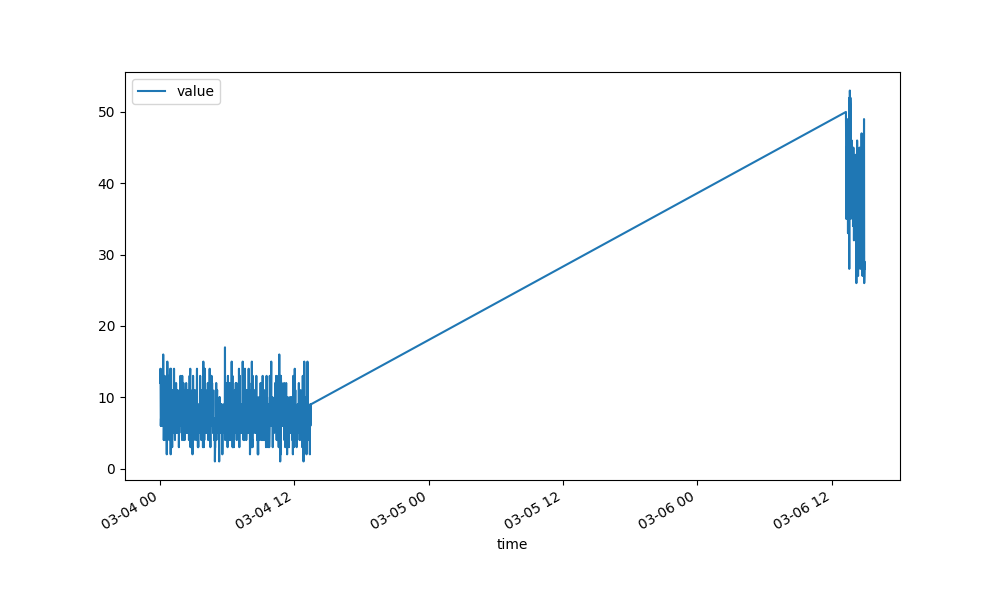

In [20]:
dd_filtered[dd_filtered["time"] > "2024-03-04"][dd_filtered["channel"] == 11].plot(x='time', y='value', figsize=(10, 6))

### Data filtering (since September 2023 to March 2024)

<Axes: xlabel='time'>

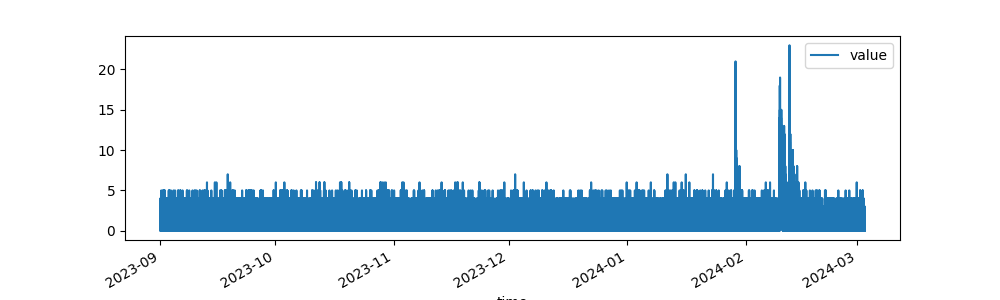

In [21]:
dd_filtered2 = dd_filtered[dd_filtered["time"] < "2024-03-03"]
dd_filtered2[dd_filtered2["channel"] == 1].plot(x='time', y='value', figsize=(10, 3))

### Calculate STD for DD channel values

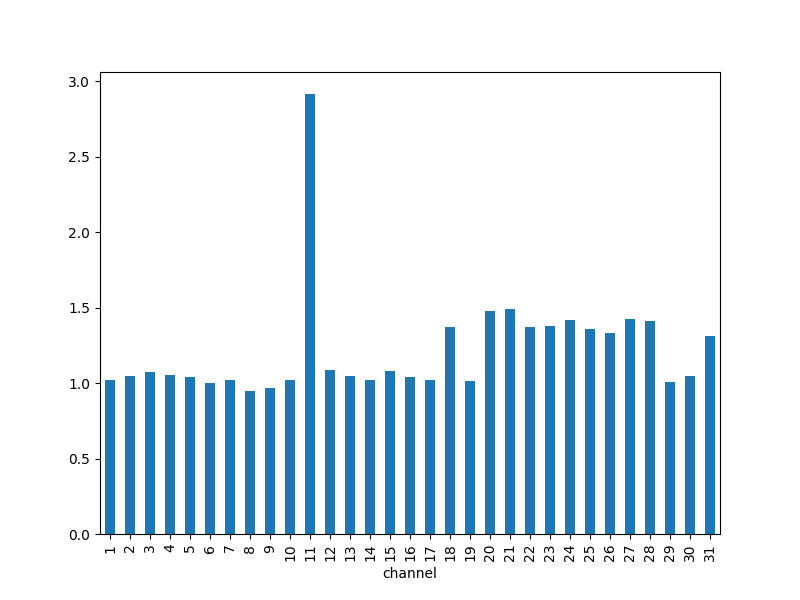

In [22]:
plt.figure(figsize=(8, 6))
dd_filtered2.groupby('channel')['value'].std().plot(kind='bar')
plt.show()

### Calculate mean for DD channel values

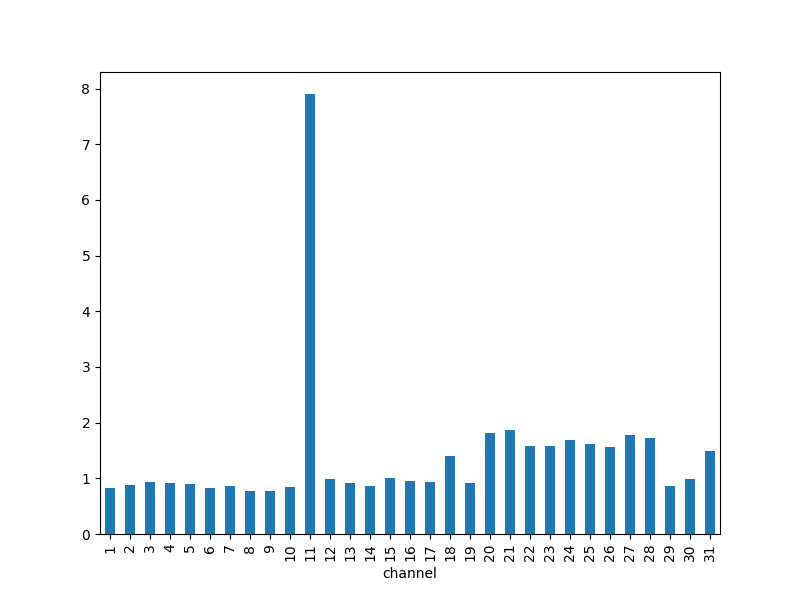

In [23]:
plt.figure(figsize=(8, 6))
dd_filtered2.groupby('channel')['value'].mean().plot(kind='bar')
plt.show()

### Channel 11

<Axes: xlabel='time'>

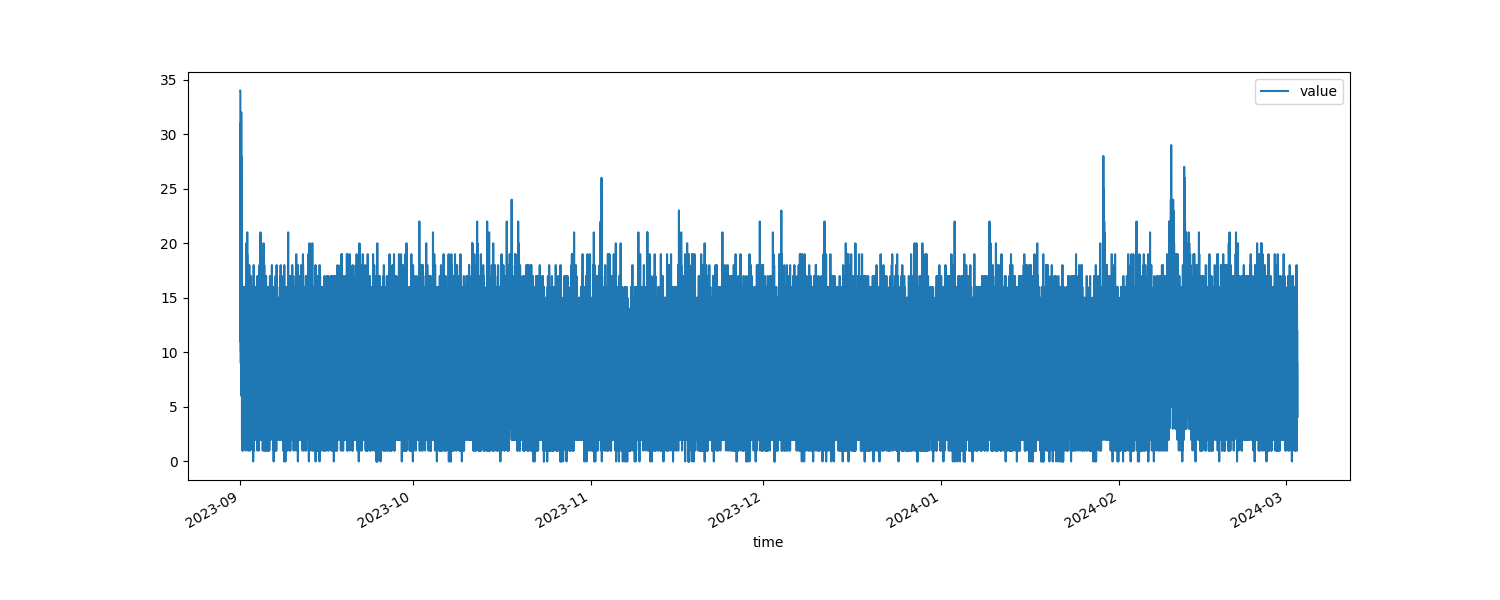

In [24]:
dd_filtered2[dd_filtered2["channel"] == 11].plot(x='time', y='value', figsize=(15, 6))

### Channel 1

<Axes: xlabel='time'>

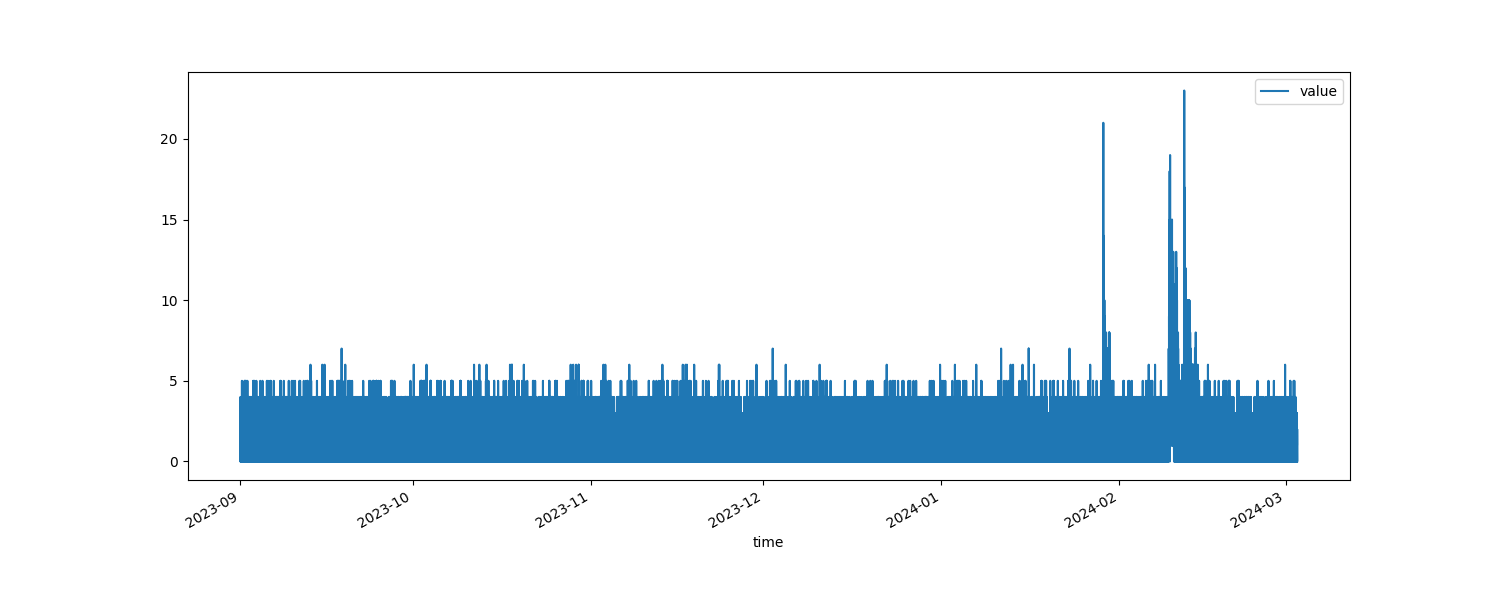

In [25]:
dd_filtered2[dd_filtered2["channel"] == 1].plot(x='time', y='value', figsize=(15, 6))

## Mapping 3D DD data

In [26]:
sample = dd_filtered2[dd_filtered2["time"] == "2023-09-01 00:00:56.057000"].sort_values(by='channel')
sample

,time,event_type,channel,value
19764002,2023-09-01 00:00:56.057,d,1,1
19764003,2023-09-01 00:00:56.057,d,2,2
19764004,2023-09-01 00:00:56.057,d,3,2
19764005,2023-09-01 00:00:56.057,d,4,4
19764006,2023-09-01 00:00:56.057,d,5,2
19764007,2023-09-01 00:00:56.057,d,6,0
19764008,2023-09-01 00:00:56.057,d,7,4
19764009,2023-09-01 00:00:56.057,d,8,1
19764010,2023-09-01 00:00:56.057,d,9,0
19764011,2023-09-01 00:00:56.057,d,10,2


Text(0.5, 0, 'Z')

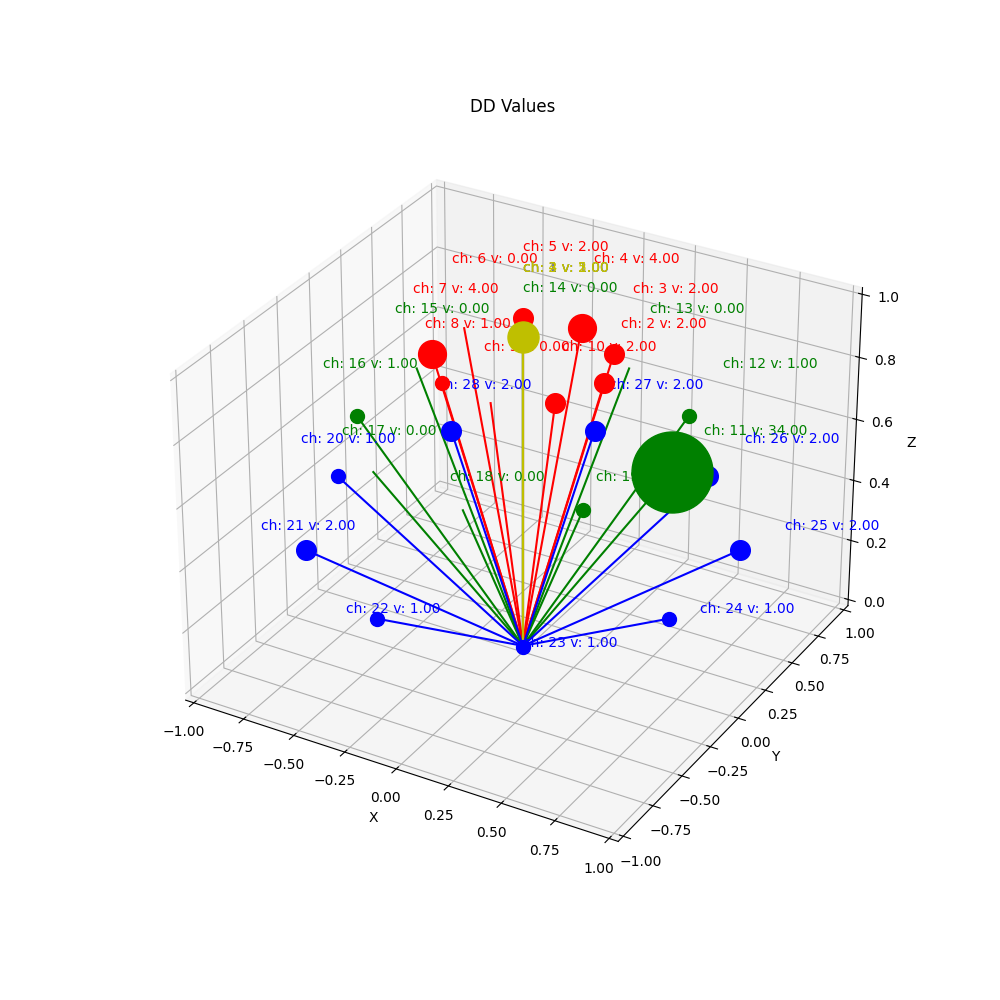

In [27]:
vectors = [(0,0,0, *vec) for vec in kernel_selector("BORESIGHT").values()]
colors = ["b"] * 1 + ["r"] * 9 + ["g"] * 9 + ["b"] * 9 + ["y"] * 3 
labels = [1 + int(name.split("_")[-1]) for name in kernel_selector("NAME").values()] # We increment the channel number here 
values = [val for val in sample["value"]]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('DD Values')

for vec, color, label, value in zip(vectors, colors, labels, values):
    x_start, y_start, z_start, x_end, y_end, z_end = vec

    ax.scatter(x_end, y_end, z_end, color=color, s=value*100)

    ax.plot([x_start, x_end], [y_start, y_end], [z_start, z_end], color=color)
    
    text_offset = 1.2
    text = f"ch: {label} v: {value:.2f}"
    ax.text(x_end * text_offset, y_end * text_offset, z_end * text_offset, text, color=color)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')